# 1. Library Imports
<a id='li'></a>

In [501]:
### IMPORTS
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install umap-learn

### LIBRARIES
import pandas as pd
import numpy as np
import umap

from sklearn.preprocessing import MinMaxScaler

from utils2 import *

### WARNINGS
import warnings
warnings.filterwarnings('ignore')

### AUTORELOAD
%load_ext autoreload
%autoreload 2

# Set the path to the data files
preference_path = 'Data/Final_Data/preference_perspective.csv'
demograohics_path = 'Data/Final_Data/demographic_perspective.csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. Data Preparation
<a id='dp'></a>

In [502]:
preference = pd.read_csv(preference_path)
demographics = pd.read_csv(demograohics_path)

In [503]:
data = pd.concat([demographics, preference], axis=1)
data

,frequency_items,potencial_score,longevity_months,relevance_criteria,recency_in_weeks,promotional_percentage,returns,flaged,credit_factor,zip_code,...,frozen_foods,fruit_beverages,pastry,sodas,toiletries,veggies,wines,mm_kmeans3,rb_dbs5,mm_dbs5
0,38,-0.40,23,2,15,20,0,0,0.7,0,...,150,105,27,24,27,10,0,2,4,3
1,50,-0.30,24,2,10,36,0,0,0.7,0,...,26,20,31,0,2,18,2,2,0,0
2,48,1.60,32,2,20,0,0,0,0.7,0,...,0,25,32,17,33,26,0,0,0,0
3,46,-0.90,12,2,14,36,0,0,4.5,0,...,66,16,29,31,28,0,8,0,0,0
4,31,31.61,10,2,12,10,0,0,0.7,8,...,57,27,45,46,19,23,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122124,51,0.10,25,2,9,0,1,0,0.7,0,...,33,39,26,27,48,54,0,0,0,0
122125,42,30.99,23,2,15,0,0,0,0.7,8,...,40,36,27,47,15,24,3,0,0,0
122126,24,79.76,29,2,13,13,0,0,0.7,8,...,41,26,25,27,23,11,0,0,0,0
122127,29,0.50,14,2,11,0,0,0,0.7,0,...,21,27,27,10,4,34,0,0,0,0


In [504]:
data.rename(columns={'mm_kmeans5': 'd_mm_kmeans5', 'mm_ward5': 'd_mm_ward5', 'mm_kmeans3': 'p_mm_kmeans3', 'mm_dbs5': 'p_mm_dbs5'}, inplace=True)
data.drop(columns=['rb_dbs5'], inplace=True)

In [505]:
preference_metrics = ['beer', 'bottled_water', 'bread', 'meat', 'dairy', 'fresh_foods', 'frozen_foods', 'fruit_beverages', 'pastry', 'sodas', 'toiletries', 'veggies', 'wines']
preference_metrics_selected = ['beer', 'bottled_water', 'bread', 'dairy', 'fresh_foods', 'frozen_foods', 'fruit_beverages', 'pastry', 'sodas', 'toiletries', 'veggies', 'wines']
preference_lables = ['p_mm_kmeans3', 'p_mm_dbs5']

demographic_metrics = ['frequency_items', 'potencial_score', 'longevity_months', 'relevance_criteria', 'recency_in_weeks', 'promotional_percentage', 'returns', 'flaged', 'credit_factor', 'zip_code', 'education', 'gender']
demographic_metrics_selected = ['frequency_items', 'potencial_score', 'longevity_months', 'relevance_criteria', 'recency_in_weeks', 'promotional_percentage', 'returns', 'flaged']
demographic_lables = ['d_mm_kmeans5', 'd_mm_ward5']

metrics = preference_metrics + demographic_metrics
metrics_selected = preference_metrics_selected + demographic_metrics_selected
labels = preference_lables + demographic_lables


In [506]:
data_original = data.copy()

data_l = data[metrics + labels]
data_selected_l = data[metrics_selected + labels]

data = data[metrics]
data_selected = data[metrics_selected]

#### Scale the data

In [507]:
# Defining the scalers
minmax = MinMaxScaler()

In [508]:
# Scaling the data
dt_mm_scl = minmax.fit_transform(data_selected)

In [509]:
# Creating the scaled dataframes
data_mm_scl = data_selected.copy()
data_mm_scl[metrics_selected] = dt_mm_scl

#### Create Embedding

In [300]:
umap_object = umap.UMAP(random_state=1)
umap_embedding_mm = umap_object.fit_transform(data_mm_scl[metrics_selected])

#### Other Steps

In [455]:
data_mm_scl[labels] = data_selected_l[labels]

# Merge Perspectives

In this section te combination of clustering solutions brought from the previous clustering steps (where clustering solutions were created from different perspectives: preferences and demographic) were be tested. For each one the clusters' centroids were be found and used to build a dendrogram to help find the best number of clusters for the merged clustering solution. Then, the results were, then, analysied and compared.

## P: Kmeans 3 + D: Kmeans 5

In [457]:
make_contingency_table(data_selected_l, 'p_mm_kmeans3', 'd_mm_kmeans5')

p_mm_kmeans3,0,1,2
d_mm_kmeans5,,,
0,8087,8452,9462
1,15787,15890,17654
2,1828,1814,2006
3,11471,11656,12858
4,1518,1720,1926


In [458]:
df_hc_centroids = data_mm_scl.groupby(['p_mm_kmeans3', 'd_mm_kmeans5'])[metrics_selected].mean()
df_hc_centroids

beer  bottled_water     bread     dairy  \
p_mm_kmeans3 d_mm_kmeans5                                                
0            0             0.045752       0.141113  0.039413  0.071208   
             1             0.044783       0.139400  0.038737  0.069703   
             2             0.044780       0.141316  0.038487  0.069280   
             3             0.045210       0.140310  0.038046  0.070383   
             4             0.054070       0.138492  0.045718  0.081972   
1            0             0.142949       0.455202  0.056822  0.015913   
             1             0.141030       0.452714  0.054968  0.013861   
             2             0.141309       0.456467  0.054876  0.013809   
             3             0.141184       0.453817  0.054498  0.013989   
             4             0.156000       0.458024  0.064012  0.026478   
2            0             0.048630       0.141612  0.057887  0.019016   
             1             0.046148       0.139766  0.055369  0.014285   
             2             0.046379       0.142315  0.055290  0.014313   
             3             0.046037       0.140297  0.054900  0.014740   
             4             0.067307       0.142066  0.072375  0.035450   

                           fresh_foods  frozen_foods  fruit_beverages  \
p_mm_kmeans3 d_mm_kmeans5                                               
0            0                0.061046      0.036452         0.040134   
             1                0.057524      0.033368         0.038821   
             2                0.058127      0.035230         0.040504   
             3                0.057882      0.033639         0.038731   
             4                0.065406      0.043194         0.043629   
1            0                0.065218      0.118695         0.042173   
             1                0.058641      0.113086         0.039752   
             2                0.059928      0.115245         0.040400   
             3                0.059146      0.113542         0.039681   
             4                0.078271      0.124837         0.050679   
2            0                0.202287      0.072670         0.184509   
             1                0.193466      0.065363         0.182377   
             2                0.194920      0.067978         0.182722   
             3                0.193379      0.066851         0.182094   
             4                0.217745      0.083978         0.199359   

                             pastry     sodas  toiletries   veggies     wines  \
p_mm_kmeans3 d_mm_kmeans5                                                       
0            0             0.080501  0.025089    0.170285  0.052136  0.156192   
             1             0.075934  0.023286    0.168268  0.050372  0.150032   
             2             0.078423  0.022526    0.170074  0.048376  0.161103   
             3             0.078893  0.023465    0.169081  0.050714  0.155562   
             4             0.098010  0.038163    0.181743  0.064531  0.163299   
1            0             0.028270  0.026317    0.179522  0.039654  0.135003   
             1             0.025081  0.023368    0.175630  0.035172  0.133834   
             2             0.026152  0.023182    0.180801  0.038184  0.145014   
             3             0.026870  0.023687    0.176816  0.037080  0.135617   
             4             0.048183  0.041511    0.192886  0.058664  0.135957   
2            0             0.095477  0.027476    0.157470  0.041119  0.062740   
             1             0.092625  0.023310    0.155024  0.037666  0.060066   
             2             0.092650  0.024062    0.158673  0.040144  0.068048   
             3             0.094806  0.024225    0.153383  0.038179  0.060808   
             4             0.114906  0.044134    0.170606  0.060207  0.065243   

                           frequency_items  potencial_score  longevity_months  \
p_mm_kmeans3 d_mm_kmeans5                                              

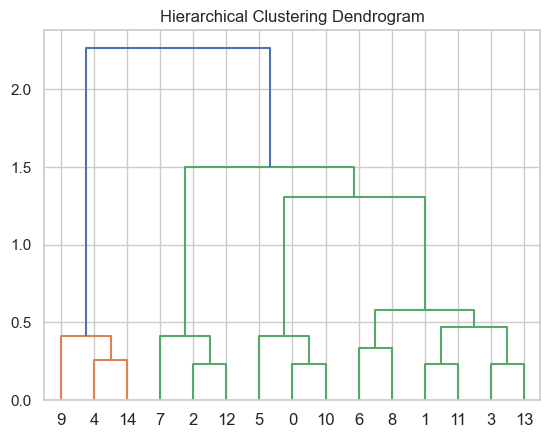

In [459]:
plot_dendrogram(df_hc_centroids, 'ward')

In [461]:
df_hc_merged, df_hc_centroids = hc_merge_mapper(data_mm_scl, 'p_mm_kmeans3', 'd_mm_kmeans5', metrics_selected, 'hc_merged_labels', 5)

In [462]:
df_hc_centroids[['hc_merged_labels']].reset_index()

,p_mm_kmeans3,d_mm_kmeans5,hc_merged_labels
0,0,0,3
1,0,1,0
2,0,2,2
3,0,3,0
4,0,4,1
5,1,0,3
6,1,1,4
7,1,2,2
8,1,3,4
9,1,4,1


In [465]:
data['hc_k3_k5'] = df_hc_merged['hc_merged_labels']

In [466]:
groupby_mean(data, 'hc_k3_k5', True, 25, ax = 1)

# observations per cluster: [57770, 5164, 5648, 26001, 27546]


hc_k3_k5,0,1,2,3,4
beer,45.540000,64.830000,58.070000,58.910000,84.430000
bottled_water,44.630000,58.030000,57.600000,57.670000,84.100000
bread,26.400000,33.570000,27.610000,28.640000,30.110000
meat,1.100000,12.620000,1.100000,4.150000,1.050000
dairy,52.350000,56.830000,45.190000,47.080000,30.410000
fresh_foods,71.930000,70.340000,59.650000,63.270000,32.720000
frozen_foods,49.180000,83.120000,70.460000,74.150000,109.990000
fruit_beverages,60.030000,54.530000,47.670000,48.910000,20.810000
pastry,58.740000,59.610000,49.880000,50.930000,30.960000
sodas,33.020000,58.230000,32.660000,36.980000,32.970000


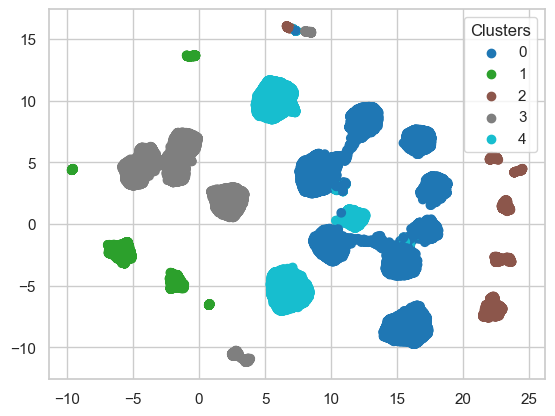

In [467]:
visualize_dimensionality_reduction(umap_embedding_mm, data['hc_k3_k5'])

## P: Kmeans 3 + D: Ward 5

In [468]:
make_contingency_table(data_selected_l, 'p_mm_kmeans3', 'd_mm_ward5')

p_mm_kmeans3,0,1,2
d_mm_ward5,,,
0,11636,11892,13037
1,2328,2406,2687
2,7686,8008,8959
3,1437,1595,1769
4,15604,15631,17454


In [469]:
df_hc_centroids = data_mm_scl.groupby(['p_mm_kmeans3', 'd_mm_ward5'])[metrics_selected].mean()
df_hc_centroids

beer  bottled_water     bread     dairy  \
p_mm_kmeans3 d_mm_ward5                                                
0            0           0.044625       0.140205  0.038116  0.070009   
             1           0.046765       0.142363  0.038896  0.070686   
             2           0.045451       0.140956  0.039397  0.070972   
             3           0.053507       0.137257  0.045946  0.082290   
             4           0.045191       0.139481  0.038680  0.069967   
1            0           0.140502       0.454206  0.054378  0.013875   
             1           0.145673       0.459631  0.056754  0.015306   
             2           0.142157       0.455037  0.056557  0.015704   
             3           0.155381       0.453754  0.063859  0.026835   
             4           0.141508       0.452405  0.055057  0.013947   
2            0           0.045314       0.140253  0.054524  0.014276   
             1           0.051045       0.143906  0.058224  0.017588   
             2           0.048118       0.141382  0.057605  0.018607   
             3           0.065718       0.140605  0.071597  0.035822   
             4           0.046648       0.139788  0.055656  0.014620   

                         fresh_foods  frozen_foods  fruit_beverages    pastry  \
p_mm_kmeans3 d_mm_ward5                                                         
0            0              0.057530      0.033198         0.038540  0.078307   
             1              0.060070      0.036675         0.040462  0.083990   
             2              0.060891      0.036188         0.040092  0.080197   
             3              0.064484      0.043092         0.043983  0.093163   
             4              0.057766      0.033688         0.038964  0.076258   
1            0              0.058456      0.112938         0.039314  0.026727   
             1              0.066565      0.116903         0.042752  0.033305   
             2              0.064708      0.118505         0.041924  0.027725   
             3              0.074449      0.125138         0.049782  0.042877   
             4              0.059083      0.113521         0.040021  0.025116   
2            0              0.192964      0.066291         0.181564  0.094932   
             1              0.206487      0.072250         0.185156  0.099257   
             2              0.200912      0.072021         0.184409  0.094840   
             3              0.212120      0.083447         0.198043  0.111125   
             4              0.193689      0.065771         0.182787  0.092484   

                            sodas  toiletries   veggies     wines  \
p_mm_kmeans3 d_mm_ward5                                             
0            0           0.023687    0.168776  0.051071  0.154365   
             1           0.025621    0.173027  0.053678  0.157913   
             2           0.024642    0.169814  0.051694  0.156922   
             3           0.037406    0.179803  0.060464  0.164100   
             4           0.023095    0.168521  0.050086  0.150781   
1            0           0.023679    0.176324  0.036457  0.134961   
             1           0.027542    0.185909  0.049775  0.141523   
             2           0.025840    0.178853  0.038629  0.135236   
             3           0.039810    0.189061  0.049416  0.136489   
             4           0.023352    0.175985  0.035502  0.134296   
2            0           0.023768    0.153933  0.037765  0.060745   
             1           0.028814    0.162801  0.051784  0.066989   
             2           0.026892    0.156757  0.040161  0.062632   
             3           0.042828    0.168283  0.050376  0.065475   
             4           0.023621    0.154665  0.037872  0.060113   

                         frequency_items  potencial_score  longevity_months  \
p_mm_kmeans3 d_mm_ward5                                                       
0            0                  0.278962         0.219926          0.449589   
             1 

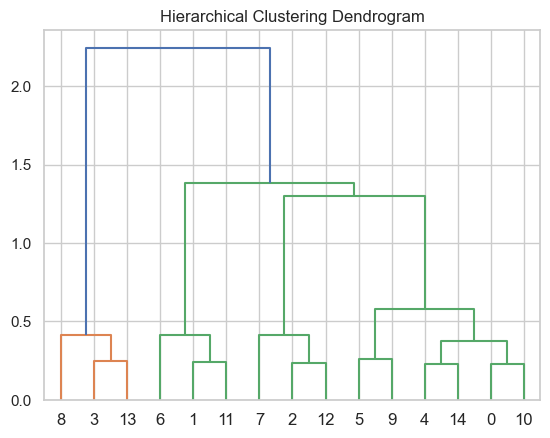

In [470]:
plot_dendrogram(df_hc_centroids, 'ward')

In [471]:
df_hc_merged, df_hc_centroids = hc_merge_mapper(data_mm_scl, 'p_mm_kmeans3', 'd_mm_ward5', metrics_selected, 'hc_merged_labels', 5)

In [472]:
df_hc_centroids[['hc_merged_labels']].reset_index()

,p_mm_kmeans3,d_mm_ward5,hc_merged_labels
0,0,0,2
1,0,1,0
2,0,2,3
3,0,3,1
4,0,4,2
5,1,0,4
6,1,1,0
7,1,2,3
8,1,3,1
9,1,4,4


In [473]:
data['hc_k3_w5'] = df_hc_merged['hc_merged_labels']

In [474]:
groupby_mean(data, 'hc_k3_w5', True, 25, ax = 1)

# observations per cluster: [7421, 4801, 57731, 24653, 27523]


hc_k3_w5,0,1,2,3,4
beer,59.720000,64.380000,45.540000,58.680000,84.420000
bottled_water,57.970000,57.700000,44.630000,57.630000,84.100000
bread,28.580000,33.370000,26.400000,28.540000,30.110000
meat,3.140000,12.790000,1.100000,3.850000,1.040000
dairy,46.470000,57.330000,52.350000,46.870000,30.410000
fresh_foods,64.050000,67.940000,71.910000,62.840000,32.700000
frozen_foods,73.380000,82.750000,49.180000,73.750000,109.980000
fruit_beverages,49.040000,53.800000,60.030000,48.800000,20.810000
pastry,52.840000,57.460000,58.720000,50.700000,30.950000
sodas,38.440000,56.400000,33.010000,36.270000,32.960000


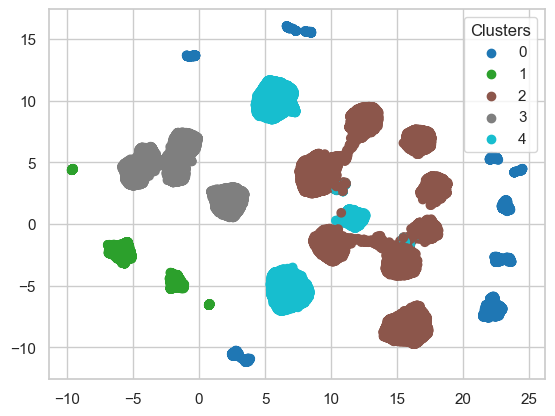

In [475]:
visualize_dimensionality_reduction(umap_embedding_mm, data['hc_k3_w5'])

## P: DBScan 5 + D: Kmeans 5

In [476]:
make_contingency_table(data_selected_l, 'p_mm_dbs5', 'd_mm_kmeans5')

p_mm_dbs5,0,1,2,3,4
d_mm_kmeans5,,,,,
0,5550,2514,3514,5965,8458
1,10990,4657,6627,10976,16081
2,1243,554,749,1282,1820
3,7956,3502,4895,7948,11684
4,1011,574,764,1190,1625


In [477]:
df_hc_centroids = data_mm_scl.groupby(['p_mm_dbs5', 'd_mm_kmeans5'])[metrics_selected].mean()
df_hc_centroids

beer  bottled_water     bread     dairy  \
p_mm_dbs5 d_mm_kmeans5                                                
0         0             0.046036       0.142810  0.031851  0.081532   
          1             0.044761       0.140161  0.031749  0.078887   
          2             0.044568       0.141427  0.030453  0.078952   
          3             0.045425       0.140781  0.030931  0.079355   
          4             0.058647       0.146350  0.041267  0.103393   
1         0             0.045829       0.145304  0.056105  0.051979   
          1             0.044978       0.140301  0.054580  0.050569   
          2             0.045193       0.142900  0.054188  0.050621   
          3             0.045438       0.142964  0.053935  0.051103   
          4             0.058985       0.175101  0.053725  0.055998   
2         0             0.046680       0.142105  0.055796  0.015104   
          1             0.045592       0.139906  0.054856  0.013564   
          2             0.046030       0.144245  0.054950  0.014048   
          3             0.045358       0.141151  0.054552  0.013855   
          4             0.057978       0.146306  0.063472  0.020124   
3         0             0.051266       0.148178  0.059489  0.020421   
          1             0.046937       0.141508  0.055929  0.014606   
          2             0.048197       0.146076  0.055940  0.014585   
          3             0.046757       0.141987  0.055371  0.015017   
          4             0.074765       0.162852  0.080560  0.040521   
4         0             0.141617       0.447783  0.056513  0.015633   
          1             0.139540       0.446965  0.054845  0.013691   
          2             0.139851       0.451413  0.054981  0.013738   
          3             0.140534       0.450442  0.054388  0.013904   
          4             0.156072       0.441607  0.062754  0.023375   

                        fresh_foods  frozen_foods  fruit_beverages    pastry  \
p_mm_dbs5 d_mm_kmeans5                                                         
0         0                0.061857      0.033965         0.040730  0.025579   
          1                0.057733      0.031930         0.038889  0.024389   
          2                0.057035      0.033606         0.038691  0.024667   
          3                0.057857      0.032642         0.038610  0.025411   
          4                0.071567      0.041368         0.047387  0.030515   
1         0                0.059758      0.034876         0.039329  0.208502   
          1                0.057807      0.031969         0.038542  0.203372   
          2                0.056538      0.033668         0.039918  0.203706   
          3                0.057871      0.033008         0.038518  0.204616   
          4                0.063304      0.045192         0.042267  0.248674   
2         0                0.200343      0.034534         0.183633  0.206670   
          1                0.193509      0.032407         0.182426  0.203185   
          2                0.195589      0.034452         0.182098  0.204494   
          3                0.193079      0.032753         0.182055  0.204441   
          4                0.213466      0.043490         0.186421  0.235814   
3         0                0.206500      0.094642         0.186184  0.027972   
          1                0.194483      0.084951         0.183903  0.024752   
          2                0.197194      0.088407         0.183748  0.026258   
          3                0.194636      0.087902         0.183232  0.026352   
          4                0.225326      0.109255         0.207860  0.036316   
4         0                0.062618      0.121013         0.040912  0.027681   
          1                0.058122      0.113839         0.039169  0.024824   
          2                0.057395      0.115523         0.039398  0.025444   
          3                0.058609      0.114227         0.039251  0.026385   
          4                0.0

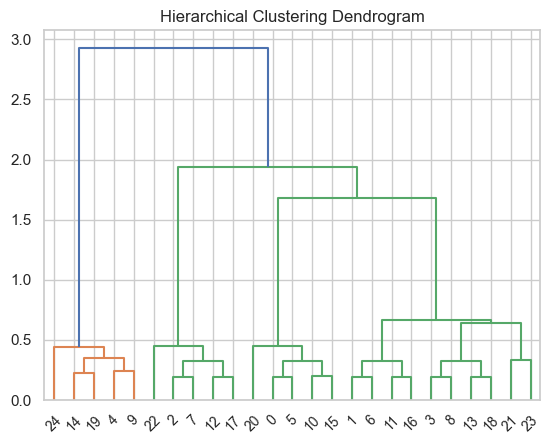

In [478]:
plot_dendrogram(df_hc_centroids, 'ward')

In [479]:
df_hc_merged, df_hc_centroids = hc_merge_mapper(data_mm_scl, 'p_mm_dbs5', 'd_mm_kmeans5', metrics_selected, 'hc_merged_labels', 5)

In [480]:
df_hc_centroids[['hc_merged_labels']].reset_index()

,p_mm_dbs5,d_mm_kmeans5,hc_merged_labels
0,0,0,1
1,0,1,4
2,0,2,2
3,0,3,0
4,0,4,3
5,1,0,1
6,1,1,4
7,1,2,2
8,1,3,0
9,1,4,3


In [481]:
data['hc_d5_k5'] = df_hc_merged['hc_merged_labels']

In [482]:
groupby_mean(data, 'hc_d5_k5', True, 25, ax = 1)

# observations per cluster: [52066, 26001, 5648, 5164, 33250]


hc_d5_k5,0,1,2,3,4
beer,66.090000,58.910000,58.070000,64.830000,45.590000
bottled_water,65.460000,57.670000,57.600000,58.030000,44.710000
bread,28.280000,28.640000,27.610000,33.570000,26.530000
meat,1.090000,4.150000,1.100000,12.620000,1.070000
dairy,40.740000,47.080000,45.190000,56.830000,52.360000
fresh_foods,50.990000,63.270000,59.650000,70.340000,72.250000
frozen_foods,82.050000,74.150000,70.460000,83.120000,48.100000
fruit_beverages,39.030000,48.910000,47.670000,54.530000,60.430000
pastry,44.220000,50.930000,49.880000,59.610000,58.450000
sodas,33.190000,36.980000,32.660000,58.230000,32.720000


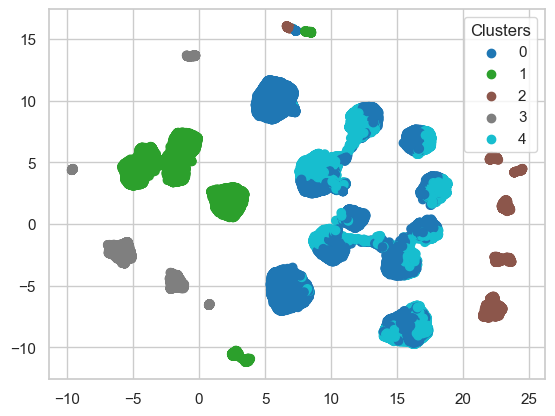

In [483]:
visualize_dimensionality_reduction(umap_embedding_mm, data['hc_d5_k5'])

## P: DBScan 5 + D: Ward 5

In [484]:
make_contingency_table(data_selected_l, 'p_mm_dbs5', 'd_mm_ward5')

p_mm_dbs5,0,1,2,3,4
d_mm_ward5,,,,,
0,8095,3523,4985,8037,11925
1,1563,752,1027,1713,2366
2,5280,2384,3321,5652,8016
3,969,517,684,1090,1541
4,10843,4625,6532,10869,15820


In [485]:
df_hc_centroids = data_mm_scl.groupby(['p_mm_dbs5', 'd_mm_ward5'])[metrics_selected].mean()
df_hc_centroids

beer  bottled_water     bread     dairy  \
p_mm_dbs5 d_mm_ward5                                                
0         0           0.044734       0.141082  0.031068  0.078987   
          1           0.046156       0.144050  0.030843  0.080011   
          2           0.045829       0.142505  0.031873  0.081391   
          3           0.058547       0.144503  0.041511  0.104240   
          4           0.045241       0.139917  0.031646  0.079155   
1         0           0.044994       0.142535  0.053863  0.050421   
          1           0.049529       0.154551  0.053949  0.051318   
          2           0.045571       0.144345  0.056081  0.051849   
          3           0.056292       0.166728  0.054561  0.056765   
          4           0.045231       0.140609  0.054645  0.051058   
2         0           0.044894       0.141609  0.054278  0.013703   
          1           0.050293       0.148344  0.056904  0.015131   
          2           0.046390       0.141839  0.055627  0.015020   
          3           0.054755       0.141418  0.062691  0.019908   
          4           0.045929       0.139501  0.055059  0.013677   
3         0           0.045776       0.141609  0.054922  0.014495   
          1           0.054714       0.154593  0.060797  0.019096   
          2           0.050632       0.147321  0.058817  0.019823   
          3           0.072035       0.156786  0.079598  0.040671   
          4           0.047571       0.141703  0.056275  0.014980   
4         0           0.139919       0.450574  0.054320  0.013744   
          1           0.144443       0.450308  0.055868  0.015529   
          2           0.140714       0.448318  0.056467  0.015304   
          3           0.155206       0.438583  0.062595  0.023437   
          4           0.139979       0.446842  0.054893  0.013805   

                      fresh_foods  frozen_foods  fruit_beverages    pastry  \
p_mm_dbs5 d_mm_ward5                                                         
0         0              0.057509      0.032289         0.038357  0.025357   
          1              0.059288      0.034241         0.039103  0.025213   
          2              0.061758      0.033872         0.040725  0.025560   
          3              0.070608      0.041316         0.047722  0.030275   
          4              0.057977      0.032180         0.039080  0.024414   
1         0              0.057760      0.032512         0.038216  0.204479   
          1              0.059508      0.036159         0.039655  0.220423   
          2              0.059478      0.034785         0.039234  0.207424   
          3              0.062296      0.043587         0.043118  0.237589   
          4              0.057842      0.032335         0.038778  0.203235   
2         0              0.192941      0.032499         0.181495  0.204603   
          1              0.205570      0.036856         0.181963  0.216372   
          2              0.199341      0.034325         0.183738  0.205624   
          3              0.207416      0.042175         0.187073  0.228067   
          4              0.193553      0.032574         0.182857  0.202966   
3         0              0.193971      0.087103         0.182753  0.026021   
          1              0.211743      0.094625         0.187586  0.028672   
          2              0.204613      0.093670         0.185867  0.027719   
          3              0.219023      0.107953         0.206023  0.035554   
          4              0.194816      0.085540         0.184299  0.024950   
4         0              0.057901      0.113678         0.038939  0.026157   
          1              0.060683      0.118398         0.040331  0.027840   
          2              0.062350      0.120656         0.040758  0.027331   
          3              0.068408      0.129819         0.046650  0.033694   
          4              0.058638      0.114229         0.039397  0.024975   

                         sodas  toiletries   veggies   

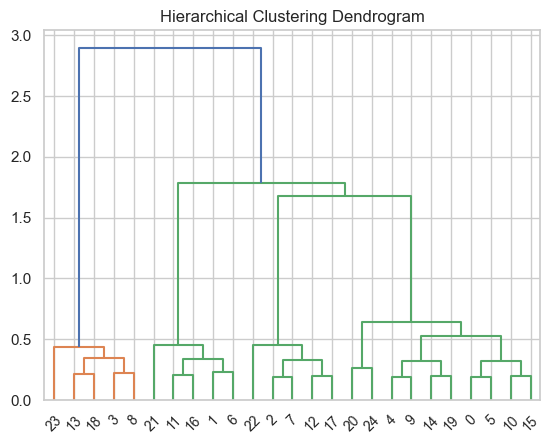

In [486]:
plot_dendrogram(df_hc_centroids, 'ward')

In [487]:
df_hc_merged, df_hc_centroids = hc_merge_mapper(data_mm_scl, 'p_mm_dbs5', 'd_mm_ward5', metrics_selected, 'hc_merged_labels', 5)

In [488]:
df_hc_centroids[['hc_merged_labels']].reset_index()

,p_mm_dbs5,d_mm_ward5,hc_merged_labels
0,0,0,0
1,0,1,2
2,0,2,1
3,0,3,3
4,0,4,0
5,1,0,0
6,1,1,2
7,1,2,1
8,1,3,3
9,1,4,0


In [489]:
data['hc_d5_w5'] = df_hc_merged['hc_merged_labels']

In [490]:
groupby_mean(data, 'hc_d5_w5', True, 25, ax = 1)

# observations per cluster: [57509, 24653, 7421, 4801, 27745]


hc_d5_w5,0,1,2,3,4
beer,45.610000,58.680000,59.720000,64.380000,83.960000
bottled_water,44.760000,57.630000,57.970000,57.700000,83.500000
bread,26.420000,28.540000,28.580000,33.370000,30.050000
meat,1.140000,3.850000,3.140000,12.790000,0.960000
dairy,52.480000,46.870000,46.470000,57.330000,30.300000
fresh_foods,72.200000,62.840000,64.050000,67.940000,32.430000
frozen_foods,48.610000,73.750000,73.380000,82.750000,110.690000
fruit_beverages,60.310000,48.800000,49.040000,53.800000,20.540000
pastry,58.900000,50.700000,52.840000,57.460000,30.800000
sodas,33.060000,36.270000,38.440000,56.400000,32.850000


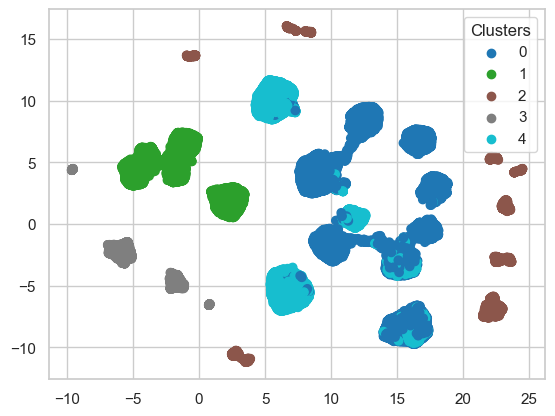

In [491]:
visualize_dimensionality_reduction(umap_embedding_mm, data['hc_d5_w5'])

## Conclusion

Based on the dendrograms plotted for each of the combinations of perspectives solutions, the obvious choice was to create 4 clusters. Based on the results of this division (not shown in this notebook), it was clear that 4 clusters was too little a division, always leating to the creation of a disproportionally big and generic cluster, comprising approximately 70% of all observations. 

Having reached this conclusion, further testing was conducted with 5 and 6 clusters. It was decided to stop at 6, since from the dendrograms it was not even obvious where the division would be made, and since the basic testing ran with these number of clusetrs let too poor results (creating small clusters with very little distinctions from the remaining ones). 

By comparing the results between merging clustering perspectives into 5 or 6 groups, it was finally decided to keep only 5 clusters. This happened as in three of the combinations the clusters that was separated when going from 5 to 6 clusters, despite separating a significantly large clusters, only had as their main distinguisher the `longevity` variable. In the remaining combinations this division ended up dividing an aready small cluster into two smaller ones, creating an even more unbalenced merging solution that it already was.

In spite of marketing campaigns sometimes being differenciated for newer or older clients, in this case, and also due to their simmilar buying behavior patterns, it was decided to save resources in marketing campaigns and keep these two groups together.

To decide between which of the combinations to merge, the variable's means were analysed for each cluester, and since they provided overall very similar results, UMAPs were plotted to help make this decision. From these visualizations, the first and second combinations (pref: kmeans3 + dem: kmeans5 and pref: kmeans3 + dem: ward5, respectively) were chosen and analysed with further detail. From this last analysis, it was finally concluded to keep the first option (**pref: kmeans3 + dem: kmeans5**) as the final solution, since it provided a slightly better cluster separation.

# Profiling

In this section visualizations were performed to better understand the created clusters' characteristics.

#### Preparing the Data

In [492]:
data.drop(columns=['hc_k3_w5', 'hc_d5_k5', 'hc_d5_w5'], inplace=True)
data.rename(columns={'hc_k3_k5': 'final_labels'}, inplace=True)
data['pref_labels'] = data_l['p_mm_kmeans3']
data['dem_labels'] = data_l['d_mm_kmeans5']

data_mm_scl.drop(columns=['p_mm_kmeans3', 'p_mm_dbs5', 'd_mm_kmeans5', 'd_mm_ward5'], inplace=True)
data_mm_scl['final_labels'] = data['final_labels']
data_mm_scl['pref_labels'] = data['pref_labels']
data_mm_scl['dem_labels'] = data['dem_labels']


In [495]:
pref_perspective = 'pref_labels'
dem_perspective = 'dem_labels'
final_perspective = 'final_labels'

labels_list = [dem_perspective, pref_perspective, final_perspective]

#### Tablular Cluster Characterization

In [493]:
groupby_mean(data, 'final_labels', True, 25, ax = 1)

# observations per cluster: [57770, 5164, 5648, 26001, 27546]


final_labels,0,1,2,3,4
beer,45.540000,64.830000,58.070000,58.910000,84.430000
bottled_water,44.630000,58.030000,57.600000,57.670000,84.100000
bread,26.400000,33.570000,27.610000,28.640000,30.110000
meat,1.100000,12.620000,1.100000,4.150000,1.050000
dairy,52.350000,56.830000,45.190000,47.080000,30.410000
fresh_foods,71.930000,70.340000,59.650000,63.270000,32.720000
frozen_foods,49.180000,83.120000,70.460000,74.150000,109.990000
fruit_beverages,60.030000,54.530000,47.670000,48.910000,20.810000
pastry,58.740000,59.610000,49.880000,50.930000,30.960000
sodas,33.020000,58.230000,32.660000,36.980000,32.970000


#### Cluster Profiles

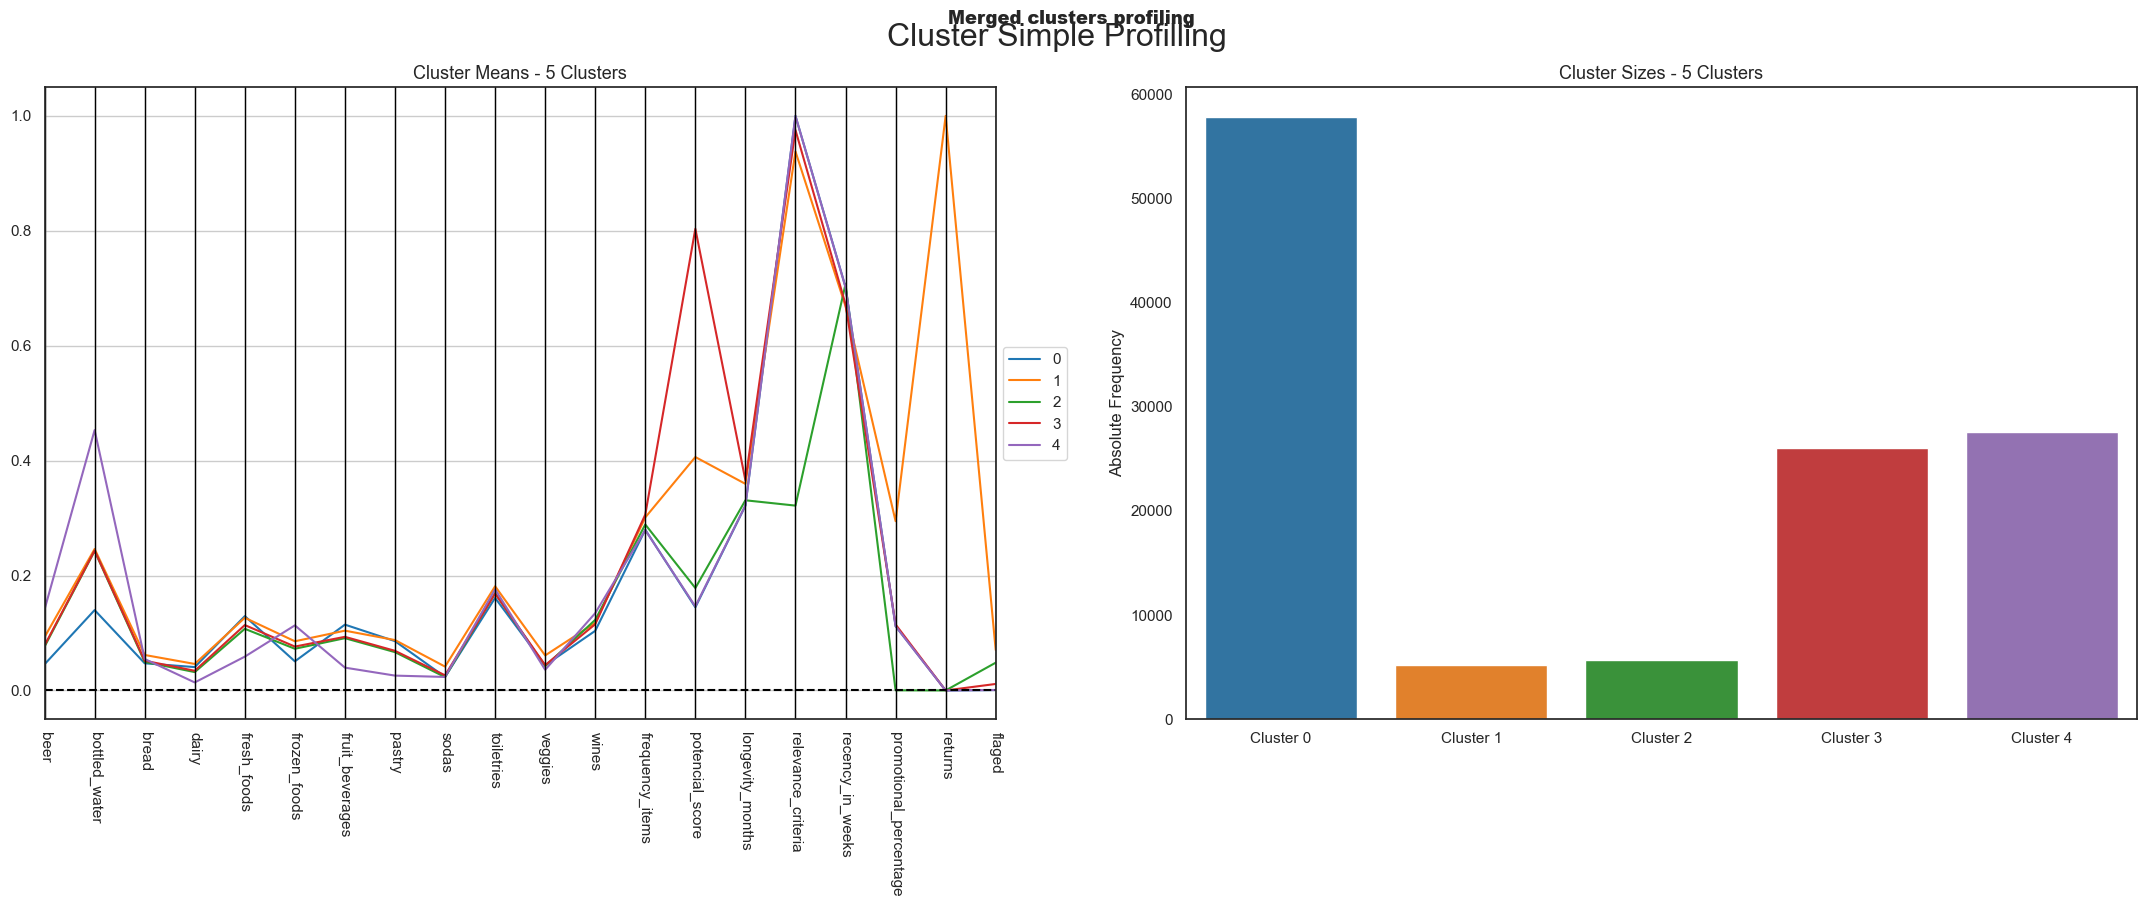

In [496]:
# Profilling each cluster (only merged)
merged_label_list = [final_perspective]
sns.set(style="white")
cluster_profiles(
    df = data_mm_scl[metrics_selected + merged_label_list],
    label_columns = merged_label_list,
    figsize = (27, 8),
    compar_titles = ["Merged clusters profiling"],
    colors='tab10'
)

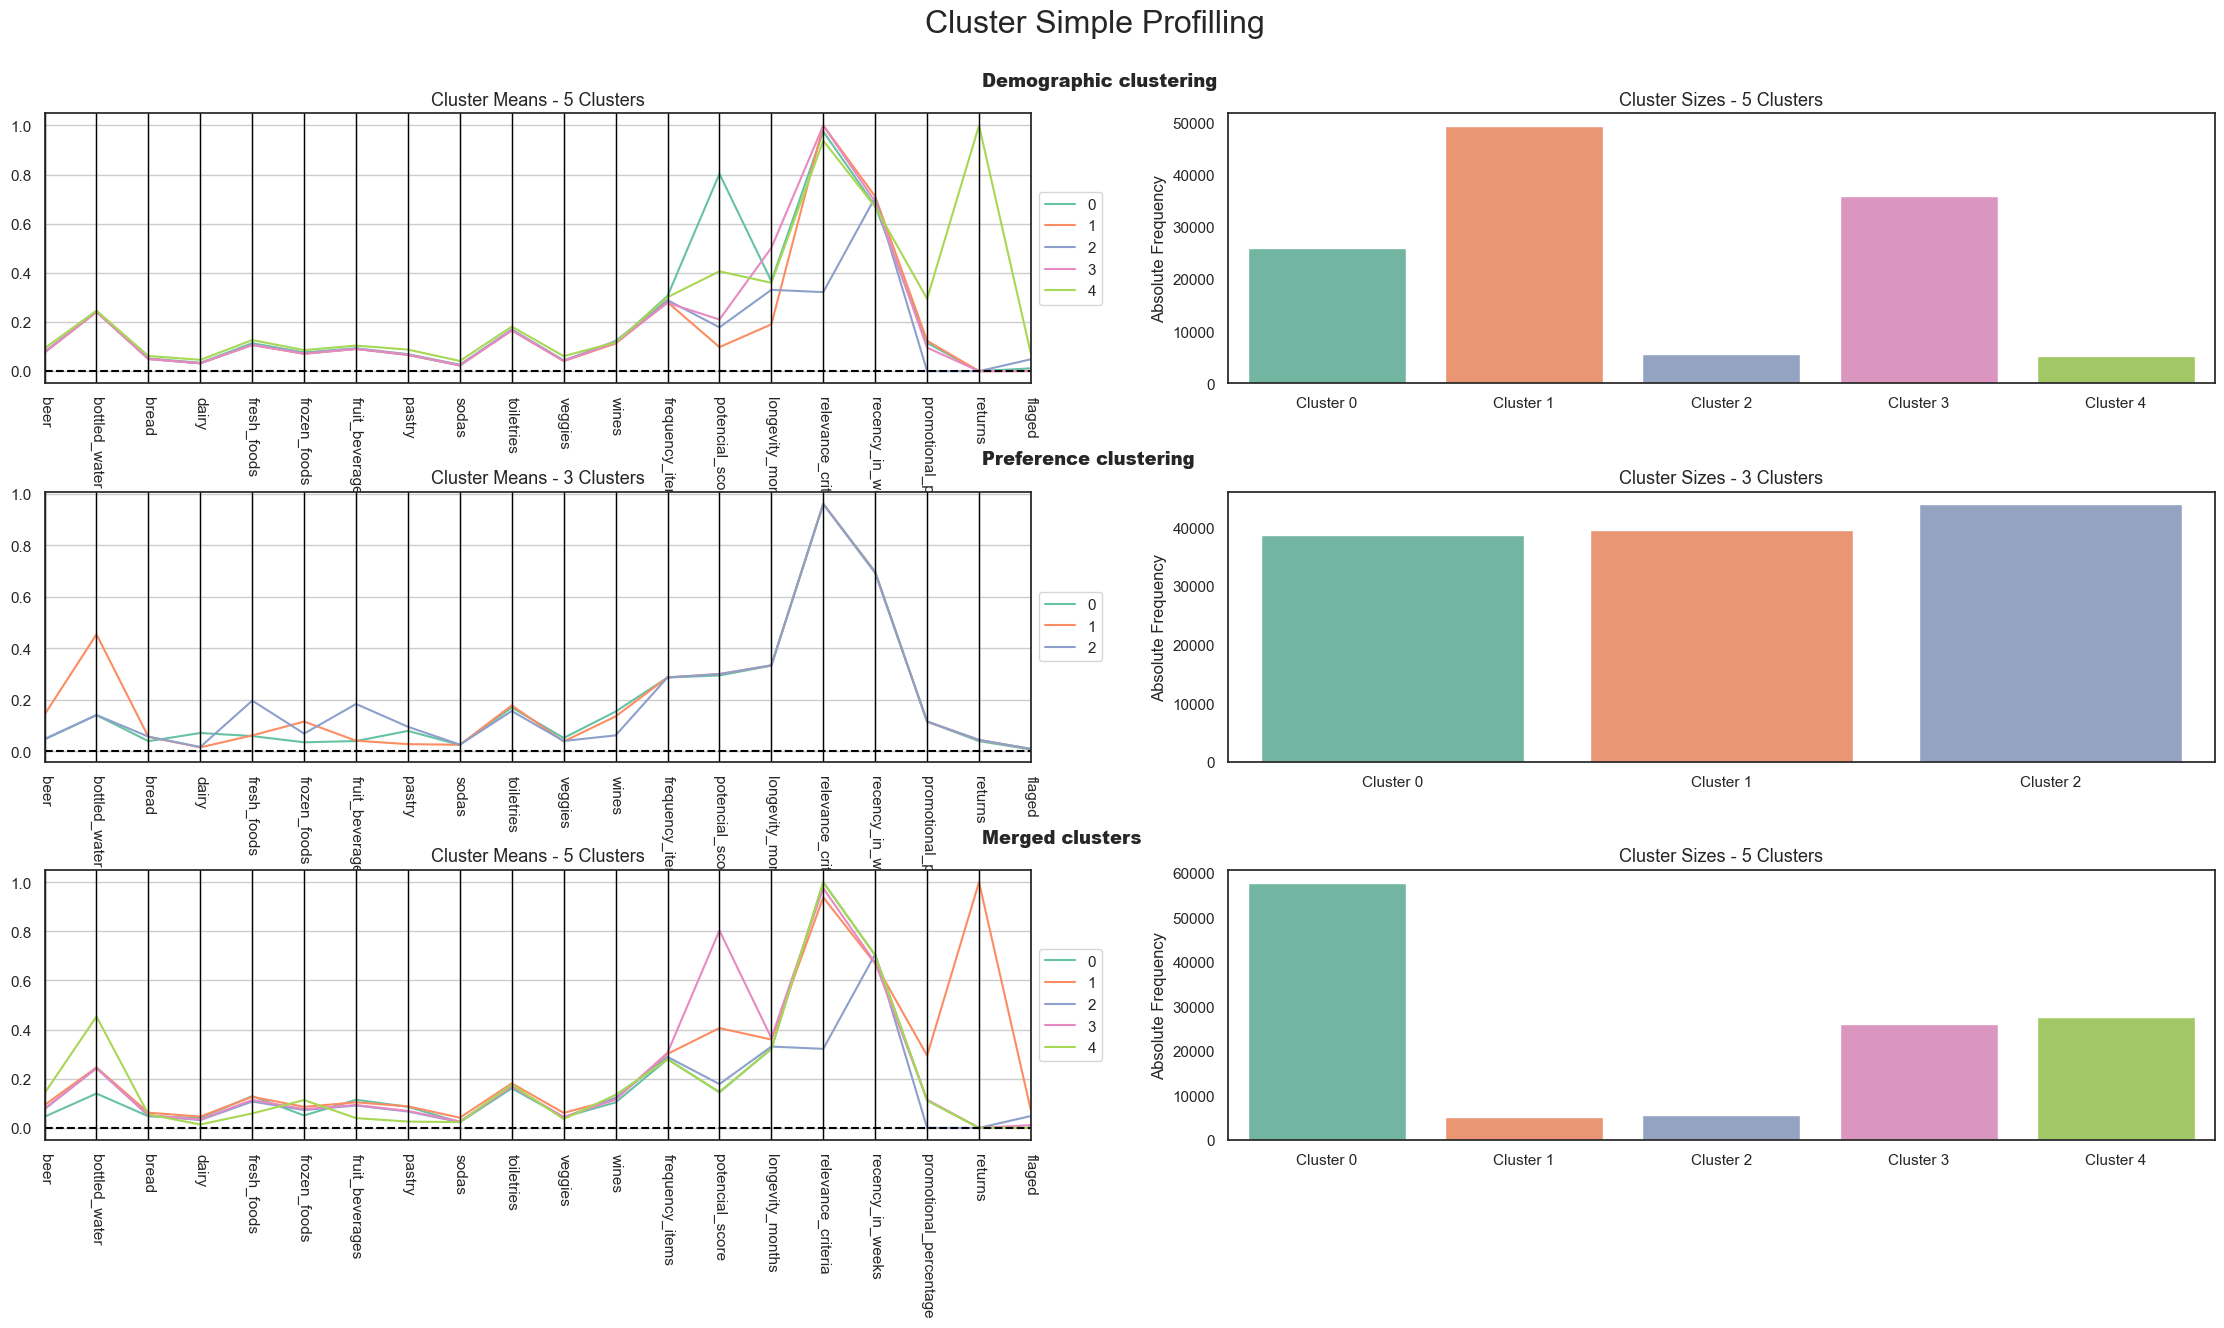

In [497]:
# Profilling each cluster (product, behavior, merged)
sns.set(style="white")
cluster_profiles(
    df = data_mm_scl[metrics_selected + labels_list],
    label_columns = labels_list,
    figsize = (28, 13),
    compar_titles = ["Demographic clustering", "Preference clustering", "Merged clusters"],
    colors='Set2'
)

#### Visualize Profiles with Heatmaps

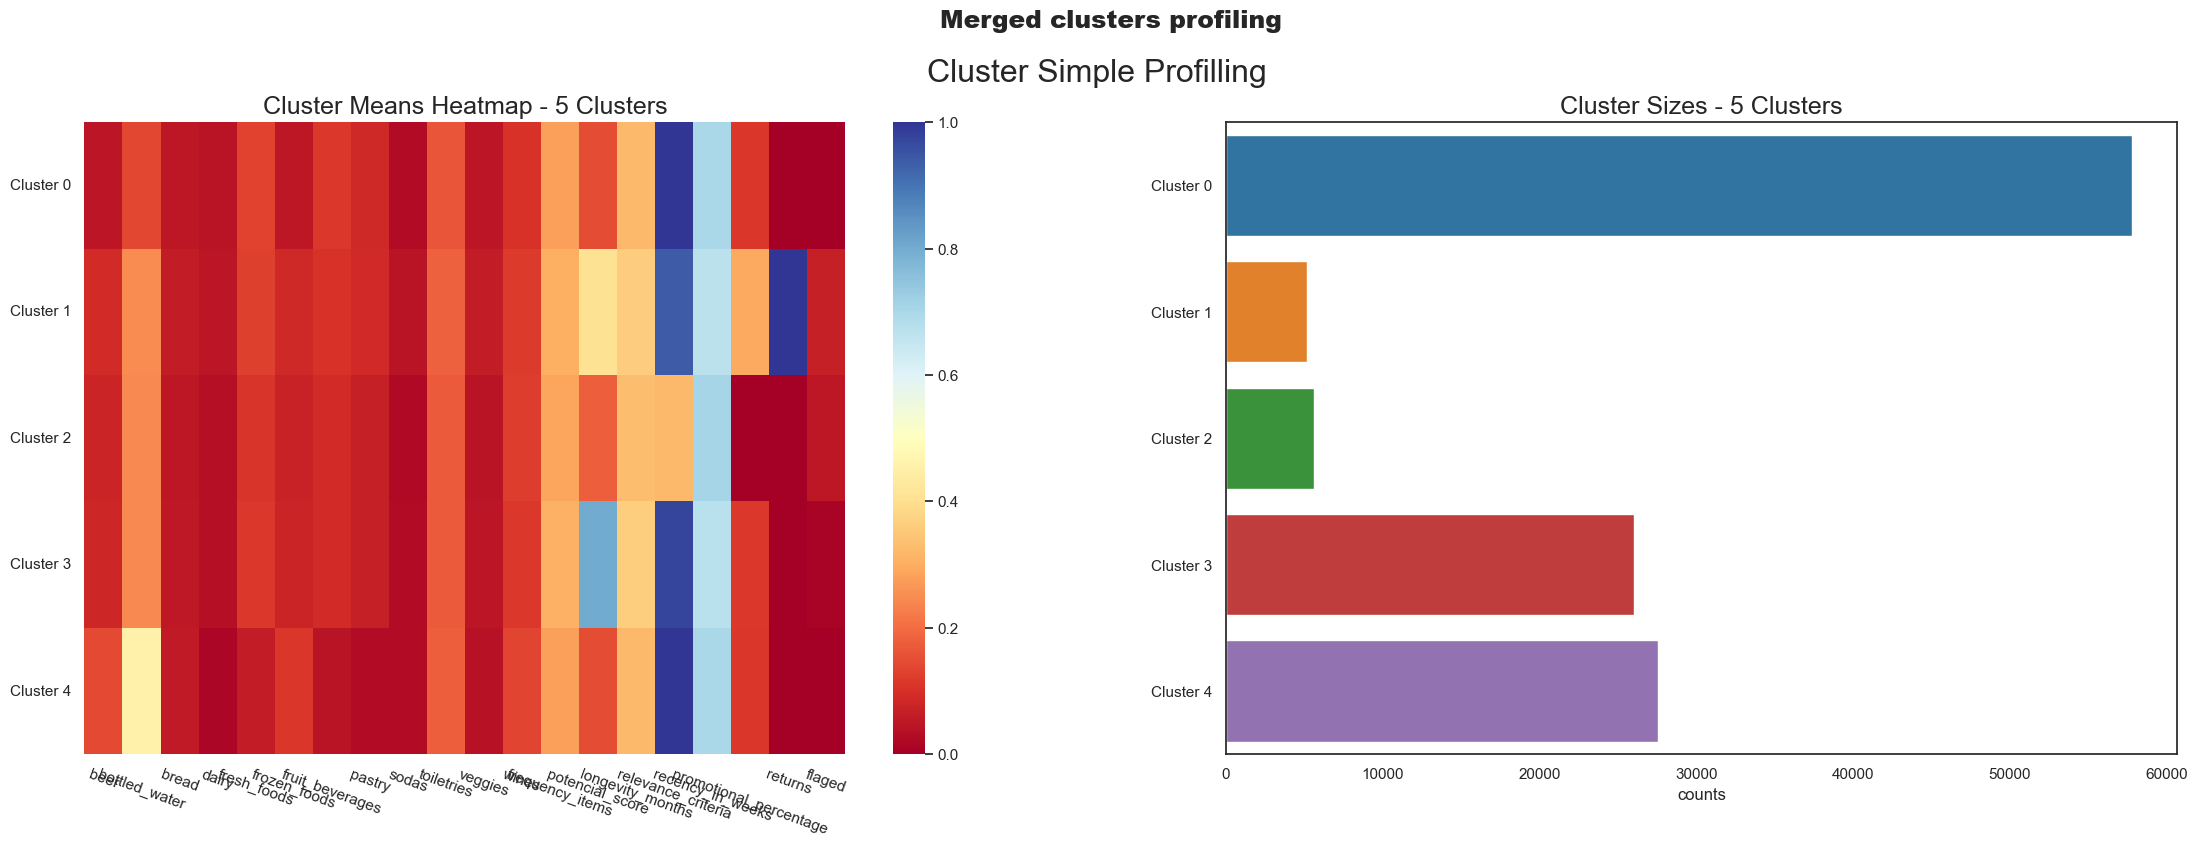

In [499]:
# Profilling each cluster (only merged)
merged_label_list = [final_perspective]
sns.set(style="white")
cluster_heatmaps(
    df = data_mm_scl[metrics_selected + merged_label_list],
    label_columns = merged_label_list,
    figsize = (27, 8),
    compar_titles = ["Merged clusters profiling"],
    bar_colors='tab10'
)

sns.set()

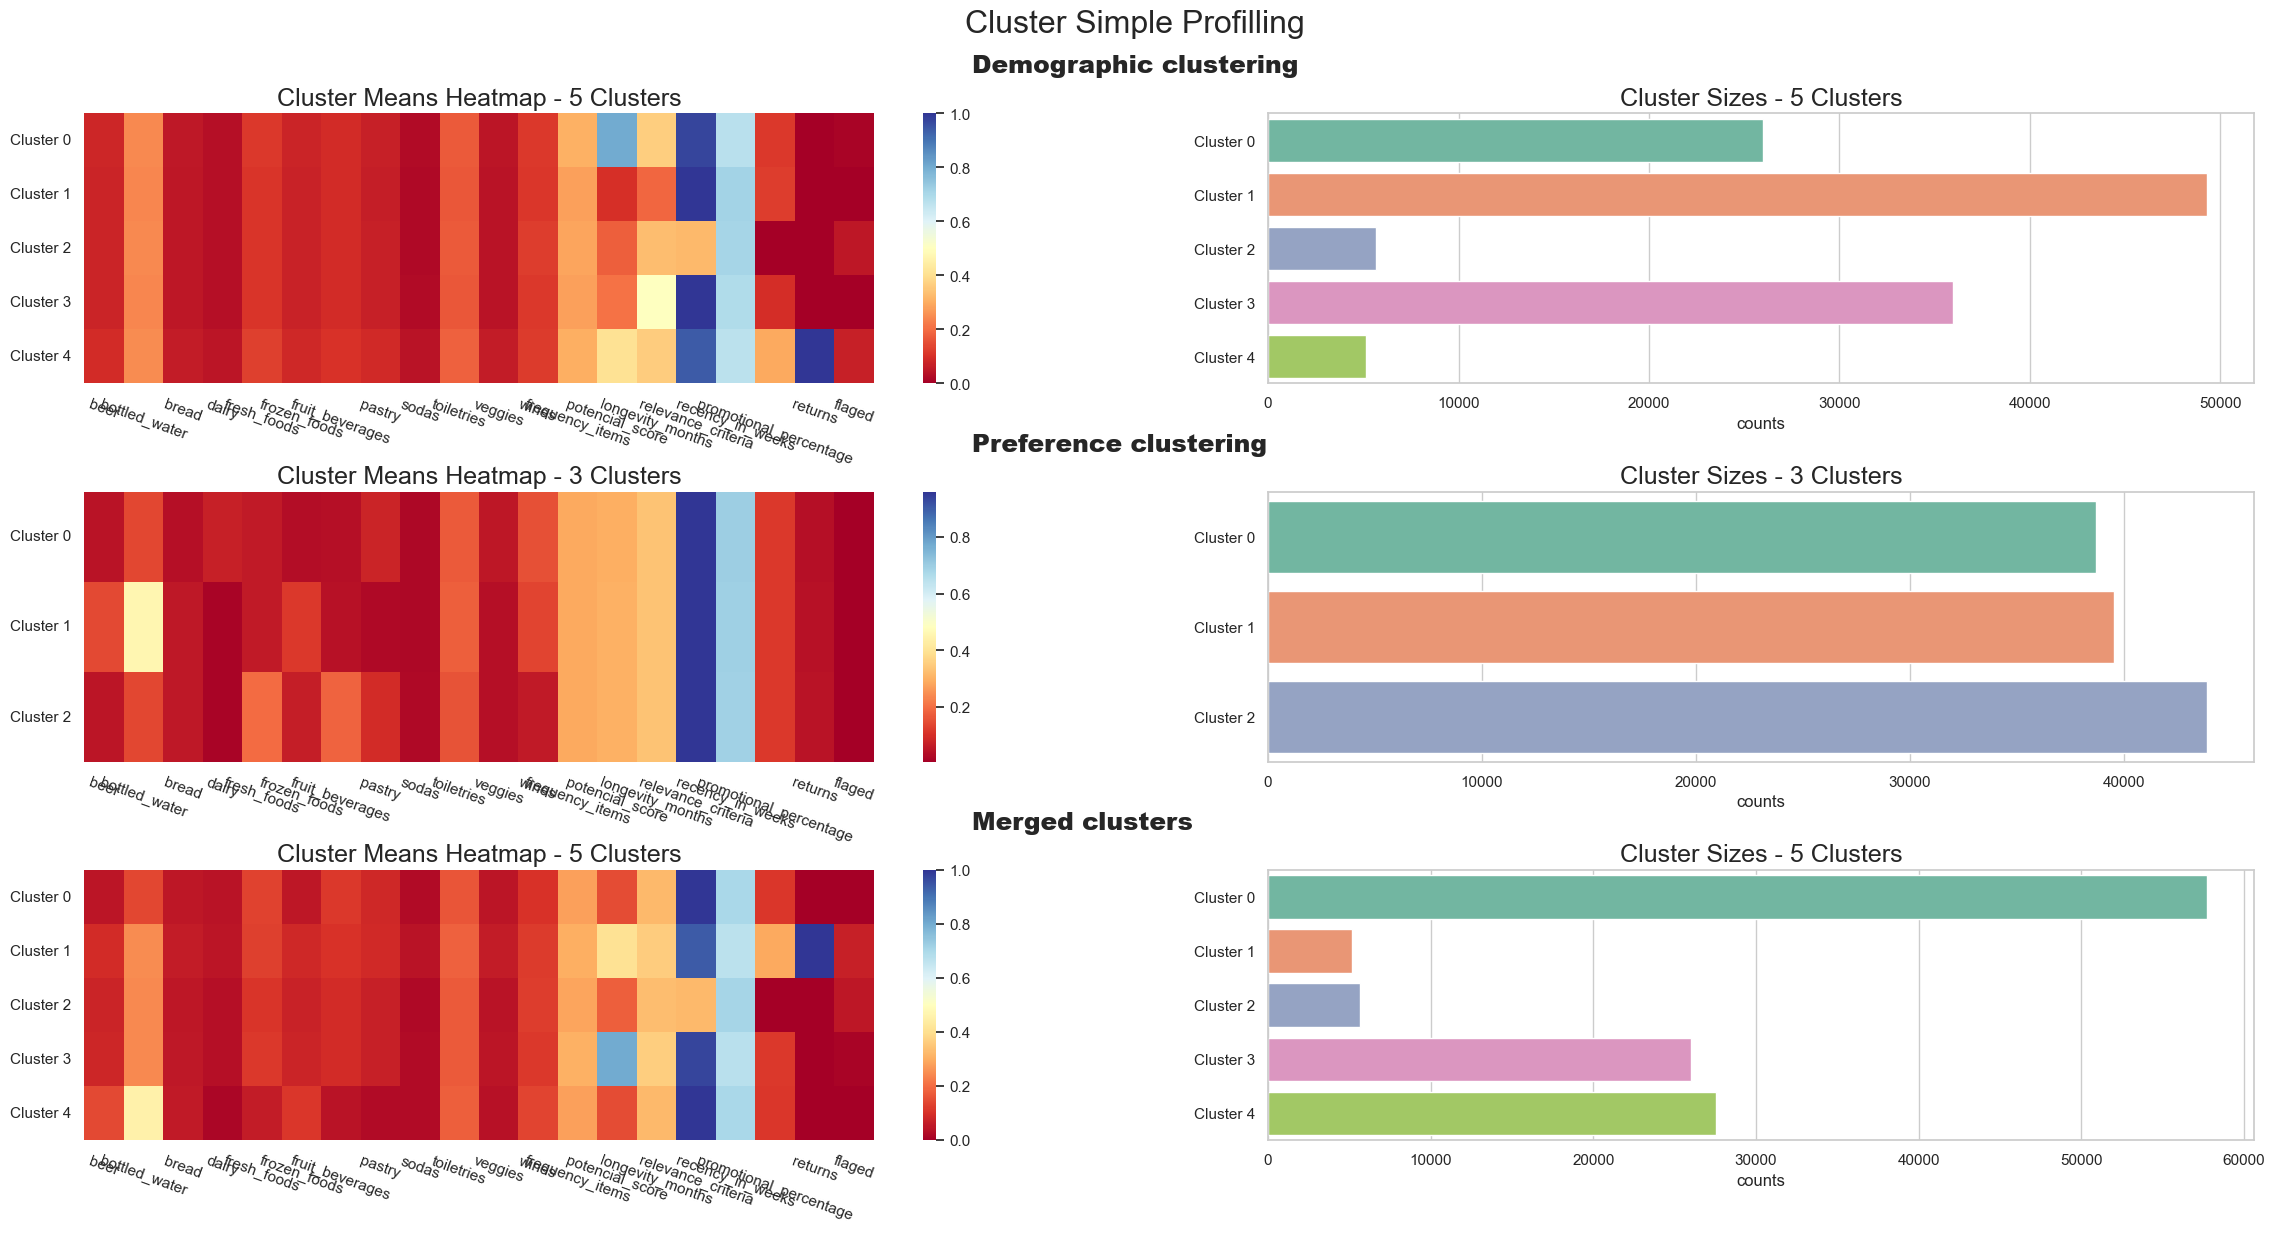

In [500]:
# Profilling each cluster (product, behavior, merged)
sns.set(style="whitegrid")
cluster_heatmaps(
    df = data_mm_scl[metrics_selected + labels_list],
    label_columns = labels_list,
    figsize = (28, 13),
    compar_titles = ["Demographic clustering", "Preference clustering", "Merged clusters"],
)
